### Draw the classic QPM plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0

In [2]:
#Length
L = 6
dz = 0.01
z = np.arange(0,L,dz)

#phase mismatch
dk = pi #phase mismatch

#Nonlinearity
X2 = 1

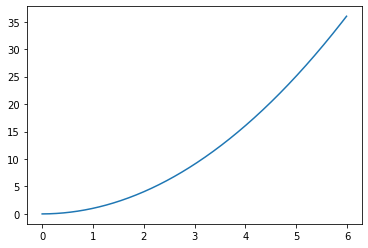

In [3]:
#Perfect phase matching
Ipm = np.cumsum(np.ones(z.size)*dz)
plt.plot(z,np.abs(Ipm)**2);

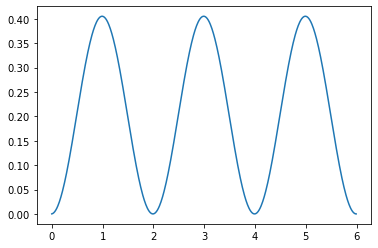

In [4]:
#No phase matching
#Integrand
fbad = X2*np.exp(1j*dk*z) 

#Integral
Ibad = np.cumsum(fbad*dz)

plt.plot(z,np.abs(Ibad)**2);

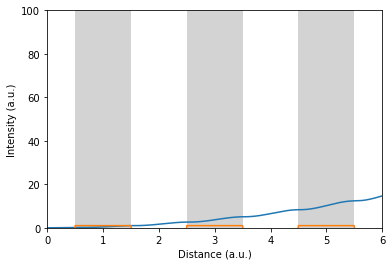

In [5]:
#QPM example
pp = pi/dk #poling period
pp = pp

X2qpm = X2*(1-2*(np.round((z+1)/pp)%2))

#Integrand
fqpm = X2qpm*np.exp(1j*dk*z) 

#Integral
Iqpm = np.cumsum(fqpm*dz)


#Plots
ymax = 100
plt.plot(z,np.abs(Iqpm)**2)

plt.plot(z,1*X2qpm)
plt.bar(np.arange(pp,L/pp+1,2),ymax,1, color='lightgray')

plt.xlabel('Distance (a.u.)')
plt.ylabel('Intensity (a.u.)')
plt.axis([0,L,0,ymax]);

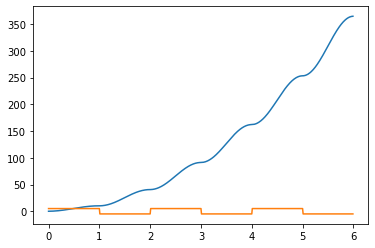

In [6]:
#QPM example #2
#Same as before, but we use the maximum X2 available...
pp = pi/dk #poling period

X2_33 = 5*X2
X2qpm2 = X2_33*np.sign(np.cos(2*pi*(z-pp/2)/(2*pp)))


#Integrand
fqpm2 = X2qpm2*np.exp(1j*dk*z) 

#Integral
Iqpm2 = np.cumsum(fqpm2*dz)


#Plots
ymax = 1
plt.plot(z,np.abs(Iqpm2)**2)

plt.plot(z,X2qpm2)
# plt.bar(x=np.arange(pp,L/pp+1,2), height=ymax, width=pp, color='lightgray')

# plt.xlabel('Distance (a.u.)')
# plt.ylabel('Intensity (a.u.)')
# plt.axis([0,L,0,ymax]);

## Summary

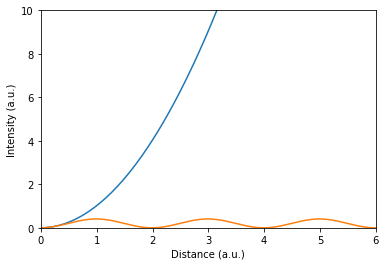

In [7]:
#Plots
ymax = 10
plt.plot(z,np.abs(Ipm)**2)
plt.plot(z,np.abs(Ibad)**2)

plt.xlabel('Distance (a.u.)')
plt.ylabel('Intensity (a.u.)')
plt.axis([0,L,0,ymax]);

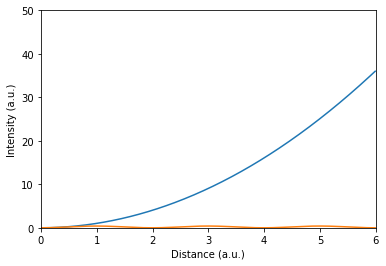

In [8]:
#Plots
ymax = 50
plt.plot(z,np.abs(Ipm)**2)
plt.plot(z,np.abs(Ibad)**2)

plt.xlabel('Distance (a.u.)')
plt.ylabel('Intensity (a.u.)')
plt.axis([0,L,0,ymax]);

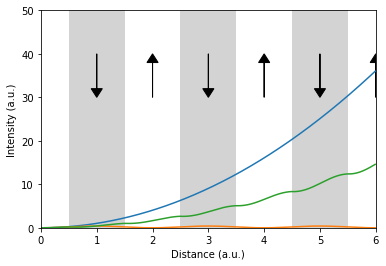

In [9]:
ymax = 50
plt.plot(z,np.abs(Ipm)**2)
plt.plot(z,np.abs(Ibad)**2)
plt.plot(z,np.abs(Iqpm)**2)

plt.bar(np.arange(pp,L/pp+1,2),ymax,1, color='lightgray')
plt.xlabel('Distance (a.u.)')
plt.ylabel('Intensity (a.u.)')
plt.axis([0,L,0,ymax]);

#Arrows
al = 8
plt.arrow(pp,40,0,-al, head_width=0.2, head_length=2, fc='k', ec='k')
plt.arrow(3*pp,40,0,-al, head_width=0.2, head_length=2, fc='k', ec='k')
plt.arrow(5*pp,40,0,-al, head_width=0.2, head_length=2, fc='k', ec='k')

plt.arrow(2*pp,30,0,al, head_width=0.2, head_length=2, fc='k', ec='k')
plt.arrow(4*pp,30,0,al, head_width=0.2, head_length=2, fc='k', ec='k')
plt.arrow(6*pp,30,0,al, head_width=0.2, head_length=2, fc='k', ec='k')

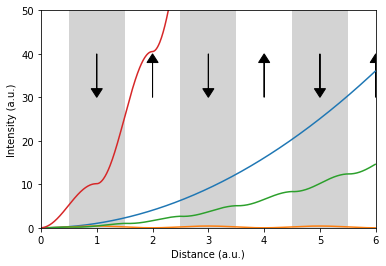

In [10]:
plt.plot(z,np.abs(Ipm)**2)
plt.plot(z,np.abs(Ibad)**2)
plt.plot(z,np.abs(Iqpm)**2)
plt.plot(z,np.abs(Iqpm2)**2)

plt.bar(np.arange(pp,L/pp+1,2),ymax,1, color='lightgray')
plt.xlabel('Distance (a.u.)')
plt.ylabel('Intensity (a.u.)')
plt.axis([0,L,0,ymax]);

#Arrows
al = 8
plt.arrow(pp,40,0,-al, head_width=0.2, head_length=2, fc='k', ec='k')
plt.arrow(3*pp,40,0,-al, head_width=0.2, head_length=2, fc='k', ec='k')
plt.arrow(5*pp,40,0,-al, head_width=0.2, head_length=2, fc='k', ec='k')

plt.arrow(2*pp,30,0,al, head_width=0.2, head_length=2, fc='k', ec='k')
plt.arrow(4*pp,30,0,al, head_width=0.2, head_length=2, fc='k', ec='k')
plt.arrow(6*pp,30,0,al, head_width=0.2, head_length=2, fc='k', ec='k')

## Generic Aperiodic Poling

In [43]:
pp0 = 1
ppf = 5

k0 = 2*pi/pp0
kf = 2*pi/ppf
L = 50

def d(z):
    phi = k0 * z + (kf - k0) * z**2 / (2 * L)
    return np.sign( np.cos( phi ) )

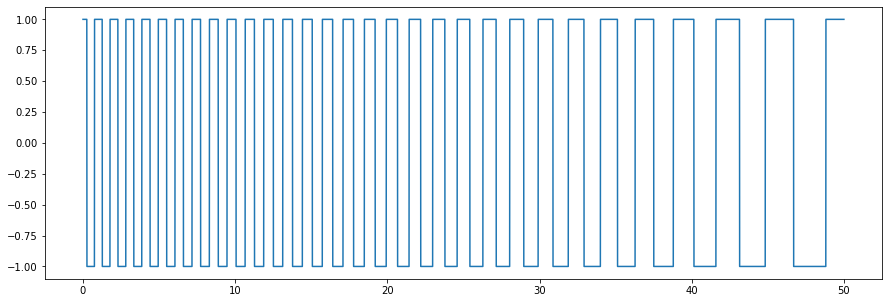

In [46]:
plt.rcParams['figure.figsize'] = [15, 5]
z = np.arange(0, L, 0.01)
plt.plot(z, d(z))

In [47]:
%timeit d(1)

2.52 µs ± 22.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [56]:
darray = d(z)
%timeit darray[100]

133 ns ± 1.01 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
